## Lista 5 - Questão 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
plt.style.use('../est.mplstyle')

In [4]:
colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]

**Espaço de estados**

In [5]:
S = np.arange(0, 4, 1)

**Matriz de Transição**

In [6]:
P = np.array([[0, 0, 0, 1],
              [0, 0, 0.8, 0.2],
              [0, 0.8, 0.2, 0],
              [0.8, 0.2, 0, 0]])

**Função de atualização**

In [7]:
def update_function(i, u, transition_matrix=P):
    state = np.digitize(u, transition_matrix.cumsum(axis=1)[i, :]).item()
    return state    

**Função de inicialização**

In [8]:
def init_function(u, distribution):
    state = np.digitize(u, distribution.cumsum(axis=0))
    return state

**Simulação**

In [9]:
def simulate(unif_sample, update_function):
    n_iter = unif_sample.shape[0] 
    chain = np.zeros(n_iter, dtype=np.int32) 
    chain[0] = 0
    for i in range(1, n_iter):
        state = update_function(chain[i-1], unif_sample[i])
        chain[i] = state
    return chain        

#### Letra c)

In [10]:
n_iter = 10**4

In [11]:
u = np.random.random(size=n_iter)

Simulação

In [12]:
x_n = simulate(u, update_function)

Visualização

In [13]:
n_steps = 40

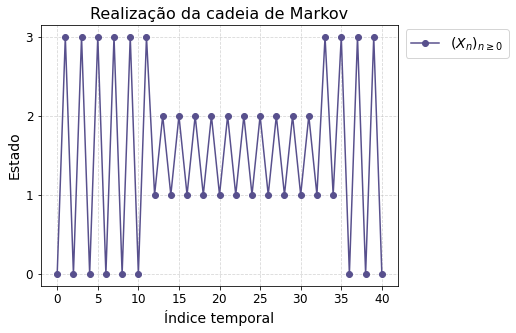

In [14]:
plt.plot(x_n[:n_steps+1], 'o-', color=colors[1], label=r"$(X_n)_{n \geq 0}$")
plt.title("Realização da cadeia de Markov")
plt.xlabel("Índice temporal")
plt.ylabel("Estado")
plt.ticklabel_format(axis='x', style='plain')
plt.xticks(list(range(0, n_steps+1, 5)))
plt.yticks(list(range(0, 4, 1)))
plt.grid(alpha=0.5, linestyle='--')
plt.legend(bbox_to_anchor=(1.33, 1.01))
plt.savefig('../figures/l5/chain-realization.pdf', bbox_inches='tight')
plt.show()

**Conta o número de transições sem guarda-chuva**

In [15]:
def transitions_without_umbrella(chain_sample):
    counter = 0
    for i in range(0, 4):
        rolled_chain = chain_sample[np.roll(chain_sample == i, shift=1)]
        rolled_chain[0] = chain_sample[0]
        counter += np.sum(rolled_chain == 3-i)
    return counter

In [16]:
max_chain_size = 5*10**4

In [17]:
n_array = np.arange(100, max_chain_size+1, 100)

In [18]:
fraction_array = []

In [19]:
for n in n_array:
    u = np.random.random(size=n)
    chain_sample = simulate(u, update_function)
    counter = transitions_without_umbrella(chain_sample)
    fraction_array.append(counter/n)
fraction_array = np.array(fraction_array)

Visualização

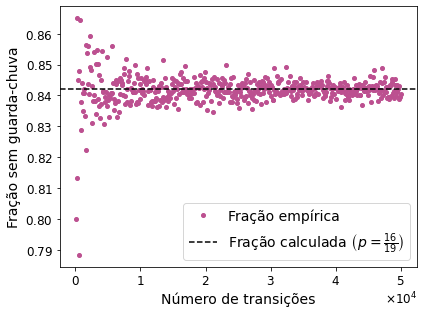

In [20]:
plt.plot(n_array, fraction_array, 'o', markersize=4, color=colors[2], label="Fração empírica")
plt.axhline(y=16/19, color='k', linestyle='dashed', label=r'Fração calculada $\left(p = \frac{16}{19}\right)$')
plt.xlabel("Número de transições")
plt.ylabel("Fração sem guarda-chuva")
plt.legend()
plt.savefig("../figures/l5/convergence.pdf", bbox_inches="tight")
plt.show()